In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire



In [2]:
# acquire iris data 
iris = acquire.get_iris_data()

Let me get that for you...


In [3]:
iris

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...,...
145,145,3,146,6.7,3.0,5.2,2.3,virginica
146,146,3,147,6.3,2.5,5.0,1.9,virginica
147,147,3,148,6.5,3.0,5.2,2.0,virginica
148,148,3,149,6.2,3.4,5.4,2.3,virginica


Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.

- Visualize the results of your clustering.

- Use the elbow method to visually select a good value for k.

- Repeat the clustering, this time with 3 different features.

In [4]:
# X is the features you want to use to cluster
X = iris[['petal_width', 'sepal_width']]

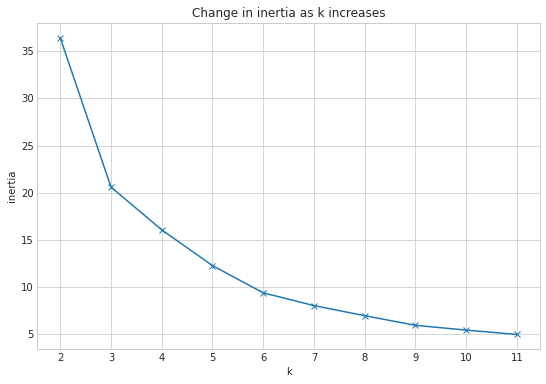

In [5]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [6]:
# KMeans with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [7]:
# Add a column to the iris dataframe called cluster
iris['cluster'] = kmeans.predict(X)

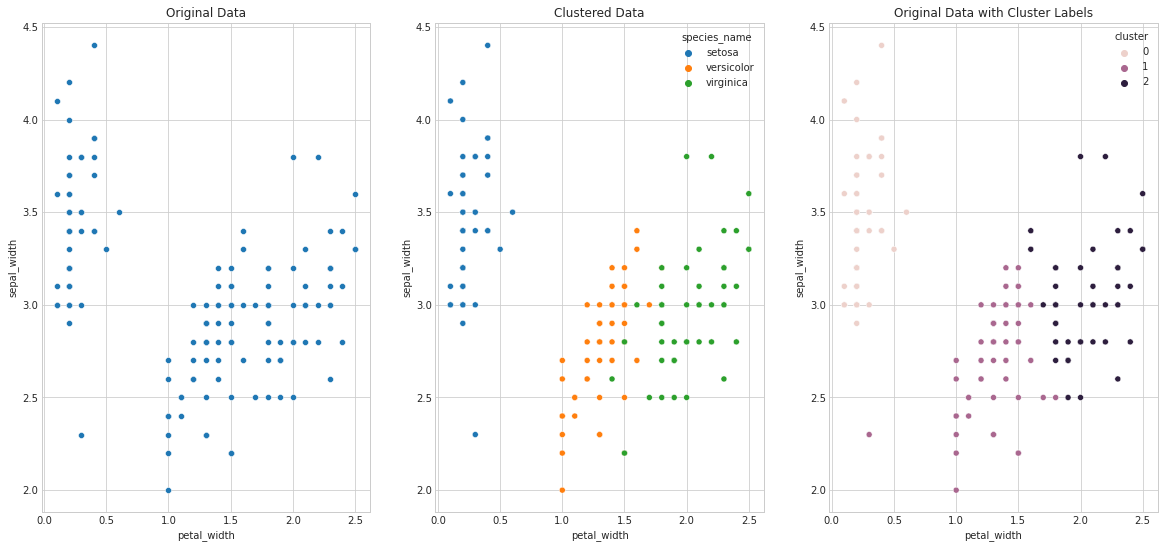

In [8]:
# create three subplots with original data, actual species, and cluster assignments
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='petal_width', y='sepal_width', data=iris)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='petal_width', y='sepal_width', hue='species_name', data=iris)
    plt.title('Clustered Data')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='petal_width', y='sepal_width', hue='cluster', data=iris)
    plt.title('Original Data with Cluster Labels')

In [9]:
kmeans.cluster_centers_ # the cluster centers

array([[0.24489796, 3.45102041],
       [1.30943396, 2.70754717],
       [2.05208333, 3.04166667]])

In [10]:
# create a dataframe of the cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,0.244898,3.451020
1,1.309434,2.707547
2,2.052083,3.041667


In [11]:
# create a dataframe of the cluster centers
iris.groupby('cluster')['petal_width', 'sepal_width'].mean()

,petal_width,sepal_width
cluster,,
0,0.244898,3.451020
1,1.309434,2.707547
2,2.052083,3.041667


Text(0.5, 1.0, 'Visualizing Cluster Centers')

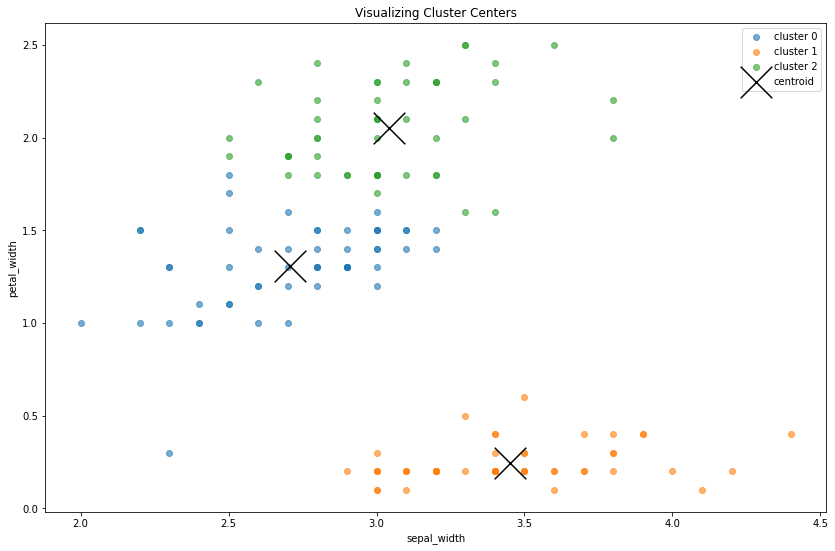

In [37]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

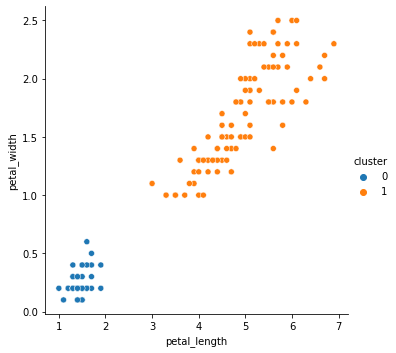

In [13]:
# explore different values of k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

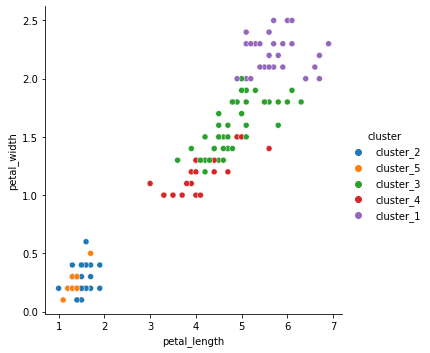

In [14]:
# Explore different values of k=5
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

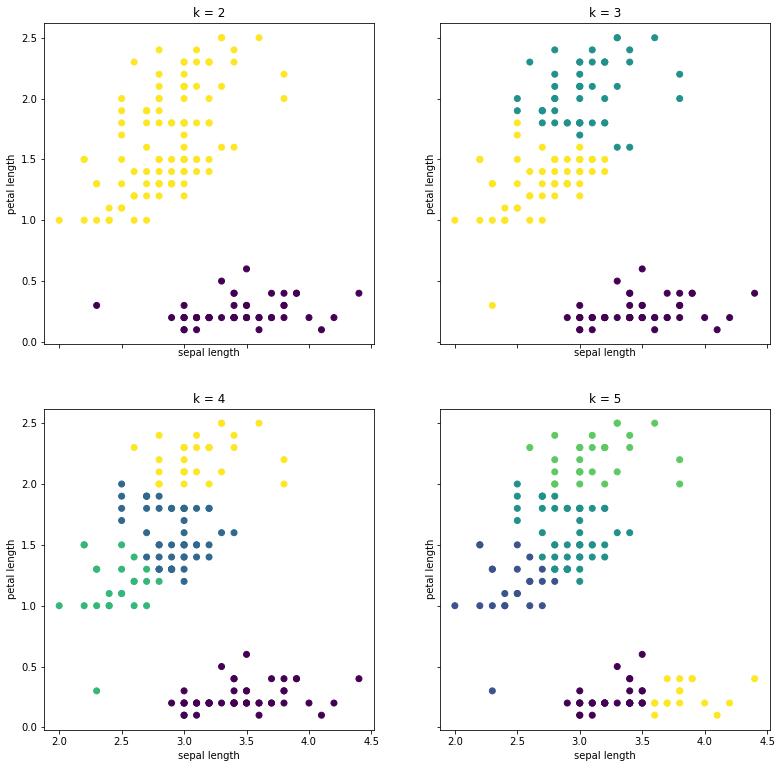

In [15]:
# visualize the clusters with differnet k values
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

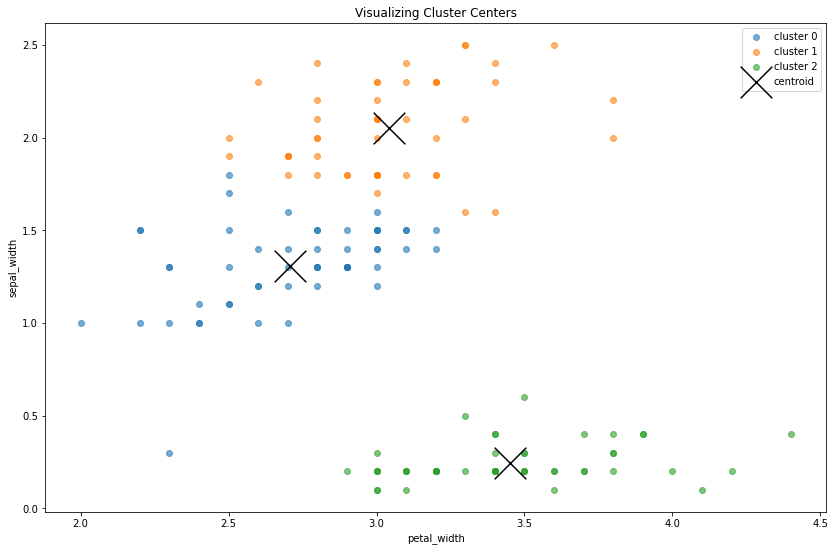

In [49]:
def cluster(df, feature1, feature2, k):
    X = df[[feature1, feature2]]

    kmeans = KMeans(n_clusters=k).fit(X)
    
    df['cluster'] = kmeans.predict(X)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

    iris.groupby('cluster')[feature1, feature2].mean()
    
    plt.figure(figsize=(14, 9))
    
    for cluster, subset in df.groupby('cluster'):
        plt.scatter(subset[feature2], subset[feature1], label='cluster ' + str(cluster), alpha=.6)
    
    centroids.plot.scatter(y=feature1, x=feature2, c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
    
    plt.legend()
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Visualizing Cluster Centers')

    return

cluster(iris, 'petal_width', 'sepal_width', 3)




In [ ]:
# scale the data min-max
from sklearn.preprocessing import MinMaxScaler

